## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

data_df = data_df.reset_index(drop=True)

# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

mice = len(data_df['Mouse ID'].unique())
print(mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = data_df[data_df.duplicated(['Mouse ID','Timepoint'])]

print((dup_mice['Mouse ID']).to_string(index= False))


 g989
 g989
 g989
 g989
 g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


data_df.drop_duplicates(['Mouse ID', 'Timepoint'], inplace= True)

clean_data_df = pd.DataFrame(data_df, columns= ['Mouse ID','Drug Regimen','Sex','Age_months',
                                                'Weight (g)','Timepoint','Tumor Volume (mm3)',
                                               'Metastatic Sites'])
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean_data_df['Mouse ID'].unique())
print(total_mice)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#create grouby object that groups by drug regimen
clean_data_drug = pd.DataFrame
data_drug_grouped = clean_data_df.groupby(['Drug Regimen'])

#mean
mean = data_drug_grouped['Tumor Volume (mm3)'].mean()

#median
median = data_drug_grouped['Tumor Volume (mm3)'].median()

#variance
variance = data_drug_grouped['Tumor Volume (mm3)'].var()

#standard deviation
std = data_drug_grouped['Tumor Volume (mm3)'].std()

#SEM
sem = data_drug_grouped['Tumor Volume (mm3)'].sem()

#create summary dataframe
sum_stats_df = pd.DataFrame({'Mean': mean,
                            'Median': median,
                            'Variance': variance,
                            'Standard Deviation': std,
                            'SEM': sem})
sum_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

sum_stats2 = clean_data_df.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']

print(sum_stats2)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

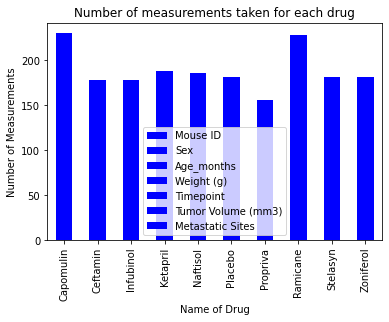

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


bar1_df = pd.DataFrame(data_drug_grouped.count())

bar_chart1 = bar1_df.plot(kind='bar',color='blue')


plt.title('Number of measurements taken for each drug')
plt.xlabel('Name of Drug')
plt.ylabel('Number of Measurements')

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



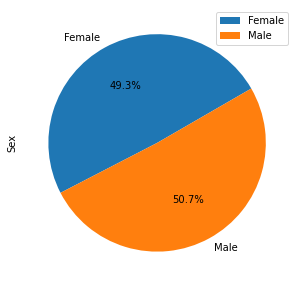

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_data_df.groupby(['Sex']).count()['Mouse ID']

gender_summary_df = pd.DataFrame({'Sex': gender})

pie_chart1 = gender_summary_df.plot.pie(y='Sex',autopct='%1.1f%%', startangle=30, figsize=(5,5))

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = clean_data_df.groupby('Mouse ID').max()['Timepoint']

last_time



Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
med_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [17]:
#Capomulin

# only include capomulin data
drug1_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]

# group by mouse ID and get final times
drug1_final_time = drug1_df.groupby('Mouse ID').max()['Timepoint']

# create dataframe
drug1_vol = pd.DataFrame(drug1_final_time)

# merge dataframe with the cleaned dataframe
capomulin_data = pd.merge(drug1_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")

capomulin_data.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [18]:
# Select Tumor Volume.  (This is the data that will be plotted and used for IQR)
cap_tumor_vol = capomulin_data["Tumor Volume (mm3)"]

cap_tumor_vol

0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [29]:
# Capomulin IQR

quartiles = cap_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
# Ramicane

In [21]:
# Ramicane IQR

In [22]:
# Infubinol

In [23]:
# Infubinol IQR

In [24]:
# Ceftamin

In [25]:
# Ceftamin IQR

{'whiskers': [<matplotlib.lines.Line2D at 0x1a55756da30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a55757b160>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1a55756d6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a55757b820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a55757bb80>],
 'means': []}

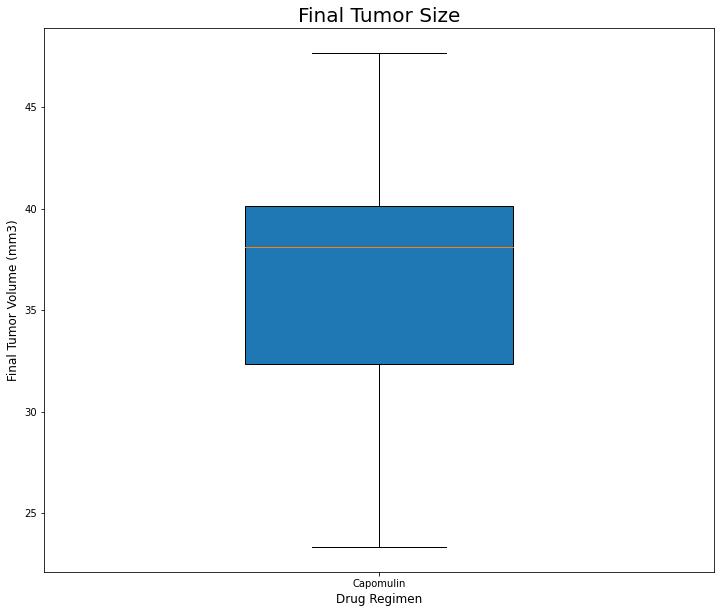

In [27]:
# Box plot


label2 = ['Capomulin']


fig1,ax1 = plt.subplots(figsize = (12, 10))
ax1.set_title('Final Tumor Size',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(cap_tumor_vol, labels=label2, widths=0.4,patch_artist=True, vert=True)

KeyError: 0.25

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
